# Customer Segment Prediction

# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Task 1: Data Loading & Exploration

In [2]:
df = pd.read_csv('Customers.csv')
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [4]:
df.isnull()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
195,False,False,False,False,False
196,False,False,False,False,False
197,False,False,False,False,False
198,False,False,False,False,False


In [5]:
df.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

# Task 2: Create Scatter Plot between Annual Income & Spending Score

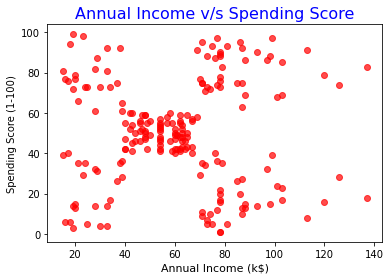

In [6]:
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'], color='red', alpha=0.7)
plt.title("Annual Income v/s Spending Score", color='blue', size=16)
plt.xlabel("Annual Income (k$)", size=11)
plt.ylabel("Spending Score (1-100)")
plt.show()

# Task 3: Perform Scaling using Min Max Scaler

In [7]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(df[['Annual Income (k$)']])
df['Annual Income (k$)_Scaled'] = scaler.transform(df[['Annual Income (k$)']])
scaler.fit(df[['Spending Score (1-100)']])
df['Spending Score_Scaled'] = scaler.transform(df[['Spending Score (1-100)']])
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Annual Income (k$)_Scaled,Spending Score_Scaled
0,1,Male,19,15,39,0.000000,0.387755
1,2,Male,21,15,81,0.000000,0.816327
2,3,Female,20,16,6,0.008197,0.051020
3,4,Female,23,16,77,0.008197,0.775510
4,5,Female,31,17,40,0.016393,0.397959


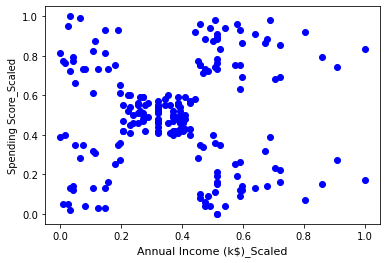

In [8]:
plt.scatter(df['Annual Income (k$)_Scaled'], df['Spending Score_Scaled'], color='blue')
plt.xlabel("Annual Income (k$)_Scaled", size=11)
plt.ylabel("Spending Score_Scaled")
plt.show()

# Task 4: Develop Clusters using KMeans

In [9]:
from sklearn.cluster import KMeans

In [10]:
k_rng = range(1,15)
sse = []

for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['Annual Income (k$)_Scaled']], df[['Spending Score_Scaled']])
    sse.append(km.inertia_)
sse

C:\Users\HOME\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[9.223144316044067,
 3.269342172056498,
 1.5800410461523071,
 0.8921064709401019,
 0.5698398408006047,
 0.3393513008535854,
 0.26417549685824365,
 0.1899562231193513,
 0.14601501248907844,
 0.12271210492454765,
 0.09626415176838465,
 0.06835274075263324,
 0.05928589461241971,
 0.05264510676698259]

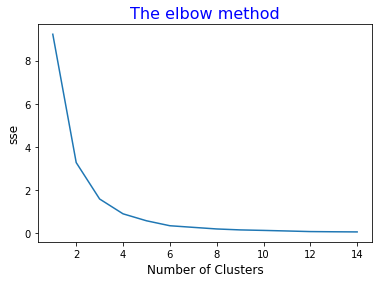

In [11]:
plt.title('The elbow method', size=16, color='blue')
plt.xlabel('Number of Clusters', size=12)
plt.ylabel('sse', size=12)
plt.plot(k_rng, sse)
plt.show()

In [12]:
km = KMeans(n_clusters=4)
y_predicted = km.fit_predict(df[['Annual Income (k$)_Scaled','Spending Score_Scaled']])
y_predicted

array([3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

In [13]:
df['cluster'] = y_predicted
df.head(10)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Annual Income (k$)_Scaled,Spending Score_Scaled,cluster
0,1,Male,19,15,39,0.000000,0.387755,3
1,2,Male,21,15,81,0.000000,0.816327,1
2,3,Female,20,16,6,0.008197,0.051020,3
3,4,Female,23,16,77,0.008197,0.775510,1
4,5,Female,31,17,40,0.016393,0.397959,3
5,6,Female,22,17,76,0.016393,0.765306,1
6,7,Female,35,18,6,0.024590,0.051020,3
7,8,Female,23,18,94,0.024590,0.948980,1
8,9,Male,64,19,3,0.032787,0.020408,3
9,10,Female,30,19,72,0.032787,0.724490,1


In [14]:
df1 = df[df.cluster == 0]
df2 = df[df.cluster == 1]
df3 = df[df.cluster == 2]
df4 = df[df.cluster == 3]

Text(0, 0.5, 'Spending Score_Scaled')

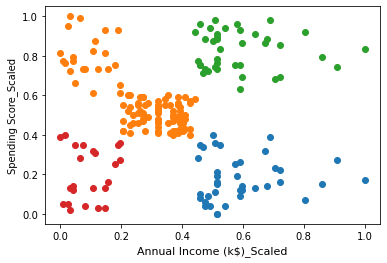

In [15]:
plt.scatter(df1['Annual Income (k$)_Scaled'],df1['Spending Score_Scaled'])
plt.scatter(df2['Annual Income (k$)_Scaled'],df2['Spending Score_Scaled'])
plt.scatter(df3['Annual Income (k$)_Scaled'],df3['Spending Score_Scaled'])
plt.scatter(df4['Annual Income (k$)_Scaled'],df4['Spending Score_Scaled'])
plt.xlabel("Annual Income (k$)_Scaled", size=11)
plt.ylabel("Spending Score_Scaled")

In [16]:
km.cluster_centers_

array([[0.59016393, 0.17991407],
       [0.27262295, 0.56612245],
       [0.58638083, 0.82783883],
       [0.09265859, 0.20319432]])

Text(0, 0.5, 'Spending Score_Scaled')

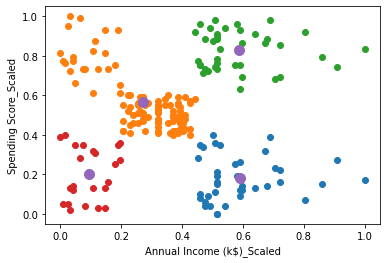

In [17]:
plt.scatter(df1['Annual Income (k$)_Scaled'],df1['Spending Score_Scaled'])
plt.scatter(df2['Annual Income (k$)_Scaled'],df2['Spending Score_Scaled'])
plt.scatter(df3['Annual Income (k$)_Scaled'],df3['Spending Score_Scaled'])
plt.scatter(df4['Annual Income (k$)_Scaled'],df4['Spending Score_Scaled'])
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], marker='o', s=100)
plt.xlabel("Annual Income (k$)_Scaled")
plt.ylabel("Spending Score_Scaled")